# Real Estate Profit Calculation

The best store location is the one that generates the most profit. The best store must meet the certain quality criterias described below.

### Criterias for the best location
- only first floor
- area - more than 40 m²,
- rental price - no more than 190,000 RUB per month,
- no more than one competitor within a walking distance,
- inside the Third Ring Road.

## 1 Data Overview

In [14]:
import pandas
import seaborn

In [2]:
realty_df = pandas.read_csv('/Users/yuliabezginova/PycharmProjects/06_DA_RealEstateProfitCalculation/yandex_realty_data.csv')

In [3]:
realty_df.head()

,floor,area_unit,total_floors,area,price,offer_type,address,commercial_type,longitude,build_year,latitude,distance,traffic,already_taken,competitors
0,NaN,SQUARE_METER,NaN,280.0,472500.0,RENT,"Россия, Москва, 1-й Басманный переулок, 5/20с1",OFFICE,37.663166,1927.0,55.772068,3.608860,542,0,3
1,NaN,SQUARE_METER,5.0,316.0,340100.0,RENT,"Россия, Москва, 1-й Басманный переулок, 5/20с1",OFFICE,37.663166,1927.0,55.772068,3.608860,542,0,2
2,NaN,SQUARE_METER,6.0,160.0,250000.0,RENT,"Россия, Москва, 1-й Басманный переулок, 5/20с1",FREE_PURPOSE,37.663166,1927.0,55.772068,3.608860,542,0,1
3,1.0,SQUARE_METER,6.0,150.0,100000.0,RENT,"Россия, Москва, 1-й Басманный переулок, 5/20с1",FREE_PURPOSE,37.663166,1927.0,55.772068,3.608860,542,0,1
4,1.0,SQUARE_METER,NaN,370.9,2700000.0,RENT,"Россия, Москва, 1-й Ботанический проезд, 5",RETAIL,37.634190,2004.0,55.851635,11.194814,468,0,1


### Is all the area values are in square meters?

In [4]:
unique_area_units = []

# найдите уникальные значения столбца 'area_unit'
# и поместите их в список unique_area_units
for uniq_unit in realty_df['area_unit']:
    if uniq_unit not in unique_area_units:
    # с помощью if проверьте, встречается ли это значение в unique_area_units
        unique_area_units.append(uniq_unit)

print(unique_area_units)

['SQUARE_METER']


### Which types of offers are in the dataset?

In [5]:
unique_offer_types = []

for offer_type in realty_df['offer_type']:
    if offer_type not in unique_offer_types:
        unique_offer_types.append(offer_type)

print(unique_offer_types)

['RENT']


### Which types of rent are in the dataset?

In [6]:
unique_commercial_types = []

# найдите уникальные значения столбца 'commercial_type'
# и поместите их в список unique_commercial_types

for com_type in realty_df['commercial_type']:
    if com_type not in unique_commercial_types:
        unique_commercial_types.append(com_type)

print(unique_commercial_types)

['OFFICE', 'FREE_PURPOSE', 'RETAIL', 'WAREHOUSE']


### What do the following columns in the dataset mean?

- longitude
- latitude
- distance
- traffic

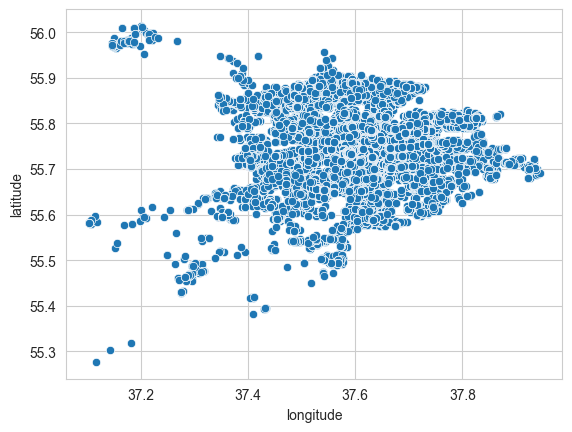

In [8]:
seaborn.scatterplot(x=realty_df['longitude'], y=realty_df['latitude']);

- distance

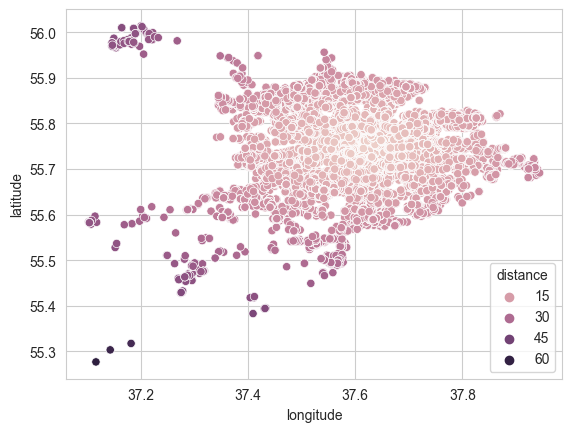

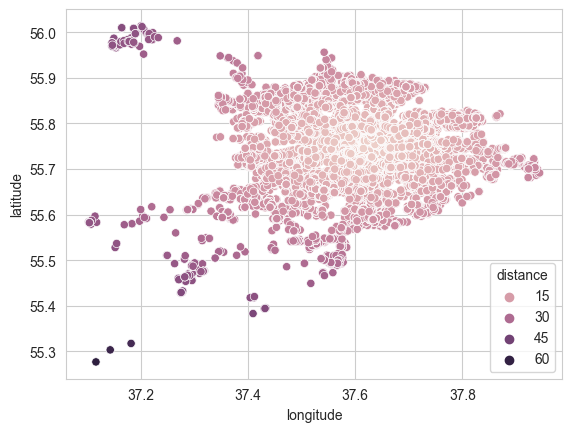

In [10]:
# hue
seaborn.scatterplot(x=realty_df['longitude'],
                    y=realty_df['latitude'],
                   hue=realty_df['distance']);

- competitors

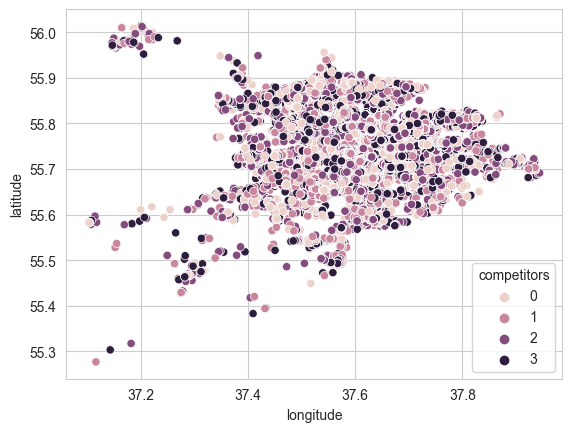

In [15]:
seaborn.scatterplot(x=realty_df['longitude'], y=realty_df['latitude'],
                   hue=realty_df['competitors']);

- traffic

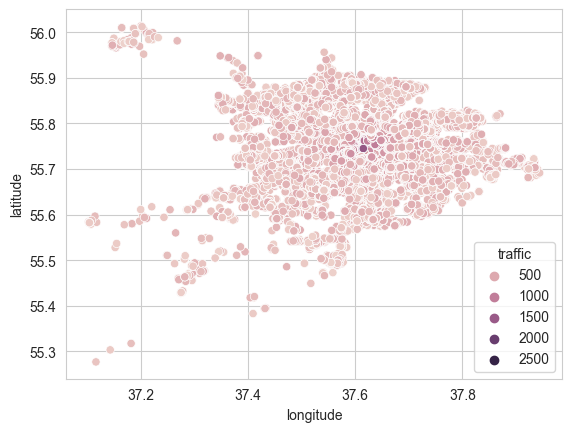

In [16]:
seaborn.scatterplot(x=realty_df['longitude'], y=realty_df['latitude'],
                   hue=realty_df['traffic']);

## 2 Exploratory Data Analysis

### 2.1 Check which stores meet the required criterias

In [18]:
# первый этаж
print(realty_df['floor'][0] == 1)

# area — не меньше 40
print(realty_df['area'][0] >=40)

# price — не больше 190000
print(realty_df['price'][0] <= 190000)

# commercial_type — либо FREE_PURPOSE, либо RETAIL
print(realty_df['commercial_type'][0] in ['FREE_PURPOSE', 'RETAIL'])

# distance не больше 6.7
print(realty_df['distance'][0] <= 6.7)

# already_taken равен 0
print(realty_df['already_taken'][0] == 0)

# competitors – не больше 1
print(realty_df['competitors'][0] <= 1)

False
True
False
False
True
True
False


In [19]:
import pandas
realty_df = pandas.read_csv('yandex_realty_data.csv')

index = 5

# первый этаж
print(realty_df['floor'][index] == 1)

# площадь — не меньше 40 кв. м
print(realty_df['area'][index] >= 40)

# цена — не больше 190000
print(realty_df['price'][index] <= 190000)

# тип помещения — либо FREE_PURPOSE, либо RETAIL
print(realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL'])

# расстояние от центра — не больше 6.7 км
print(realty_df['distance'][index] <= 6.7)

# помещение не занято, already_taken равно 0
print(realty_df['already_taken'][index] == 0)

# не больше одного конкурента поблизости
print(realty_df['competitors'][index] <= 1)

True
True
False
True
False
True
False


In [20]:
index = 5

print(realty_df['floor'][index] == 1
and realty_df['area'][index] >= 40
and realty_df['price'][index] <= 190000
and realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL']
and realty_df['distance'][index] <= 6.7
and realty_df['already_taken'][index] == 0
and realty_df['competitors'][index] <= 1) # проверьте соответствие всем условиям сразу

False


In [22]:
index = 3  # проверим другой объект

# замените print() конструкцией if-else

if (realty_df['floor'][index] == 1 and
      realty_df['area'][index] >= 40 and
      realty_df['price'][index] <= 190000 and
      realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL'] and
      realty_df['distance'][index] <= 6.7 and
      realty_df['already_taken'][index] == 0 and
      realty_df['competitors'][index] <= 1):
    print('The store fits!')
else:
    print('The store does NOT fit.')

The store fits!


In [23]:
import pandas
realty_df = pandas.read_csv('yandex_realty_data.csv')

# списки для важных параметров
filtered_objects_area = []
filtered_objects_price = []
filtered_objects_traffic = []
filtered_objects_address = []

index = 3  # это объявление соответствует всем требованиям

if (realty_df['floor'][index] == 1 and
    realty_df['area'][index] >= 40 and
    realty_df['price'][index] <= 190000 and
    realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL'] and
    realty_df['distance'][index] <= 6.7 and
    realty_df['already_taken'][index] == 0 and
    realty_df['competitors'][index] <= 1):

    filtered_objects_area.append(realty_df['area'][index])
    filtered_objects_price.append(realty_df['price'][index])
    filtered_objects_traffic.append(realty_df['traffic'][index])
    filtered_objects_address.append(realty_df['address'][index])


print(filtered_objects_area,
      filtered_objects_price,
      filtered_objects_traffic,
      filtered_objects_address)     # выводим все списки на экран

[150.0] [100000.0] [542] ['Россия, Москва, 1-й Басманный переулок, 5/20с1']


### Total number of filtered objects which fit the required criterias

In [24]:
import pandas
realty_df = pandas.read_csv('yandex_realty_data.csv')

filtered_objects_area = []
filtered_objects_price = []
filtered_objects_traffic = []
filtered_objects_address = []

# напишите цикл, который пройдёт по всем индексам датасета
for index in range(len(realty_df)):
    if (realty_df['floor'][index] == 1 and
        realty_df['area'][index] >= 40 and
        realty_df['price'][index] <= 190000 and
        realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL'] and
        realty_df['distance'][index] <= 6.7 and
        realty_df['already_taken'][index] == 0 and
        realty_df['competitors'][index] <= 1):
        filtered_objects_area.append(realty_df['area'][index])
        filtered_objects_price.append(realty_df['price'][index])
        filtered_objects_traffic.append(realty_df['traffic'][index])
        filtered_objects_address.append(realty_df['address'][index])

print(len(filtered_objects_area)) # узнаем, сколько объявлений сохранил фильтр

94


### 2.2  Formula for calculating the maximum profit

**PROFIT = REVENUE - COST**

**Expected costs:**
- 5-15% of store's visitors make a purchase;
- average paycheck is 20-22k RUB;
- profit margin is 20%;
- the store is open 18 hours per day;
- there are 2 sellers in each store;
- average salary per worker is 50 000 RUB + 43% of taxes.

As a result, the monthly costs can be calculated by the following formula:

**expected costs = rent price * number of sellers * average salary * 43% taxes**

OR

**expected costs = rent price + 2 * 50000 * 1.43**

**Expected revenue per month:**
    - traffic *
    - number of working hours per day *
    - share of passerbies *
    - share of store's visitors *
    - average paycheck *
    - profit margin *
    - number of working days per month

As a result, the profit can be calsulated by the following formula:

**expected profit = traffic * 18 * 1/225 * 0.1 * 21000 * 0.2 * 30**



Combining cost and revenue formulas, we can calculate the formula for the final profit using the logic that PROFIT = REVENUE - COST:

**PROFIT = traffic * 18 * 1/225 * 0.1 * 21000 * 0.2 * 30 - (price + 2 * 50000 * 1.43)**

In [25]:
import pandas
realty_df = pandas.read_csv('yandex_realty_data.csv')

filtered_objects_area = []
filtered_objects_price = []
filtered_objects_traffic = []
filtered_objects_address = []
filtered_objects_profits = [] # новый список для прибыльности

for index in range(len(realty_df)):
    if (realty_df['floor'][index] == 1 and
        realty_df['area'][index] >= 40 and
        realty_df['price'][index] <= 190000 and
        realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL'] and
        realty_df['distance'][index] <= 6.7 and
        realty_df['already_taken'][index] == 0 and
        realty_df['competitors'][index] <= 1):
        filtered_objects_area.append(realty_df['area'][index])
        filtered_objects_price.append(realty_df['price'][index])
        filtered_objects_traffic.append(realty_df['traffic'][index])
        filtered_objects_address.append(realty_df['address'][index])
        filtered_objects_profits.append(realty_df['traffic'][index] * 18 * 1/225 * 0.1 * 21000 * 0.2 * 30 - (realty_df['price'][index] + 2 * 50000 * 1.43))  # добавьте расчёт прибыли

print(max(filtered_objects_profits)) # выведите максимальную прибыльность среди отфильтрованных объектов

801276.0000000002


### Conclusion: One store can bring over 800k RUB per month maximum. Which store generate such profit?

Для этого пройдите по списку filtered_objects_profits и сравните его значения с максимальным. Если они совпадут — выведите на экран индекс объекта.

## 2.3 Search of the maximum profit

In [32]:
max_profit = max(filtered_objects_profits) # max profit

# search the index of a store with a MAX profit
for index in range(len(filtered_objects_profits)):
    """
    если элемент списка filtered_objects_profits равен значению
    max_profit, вывести index на экран
    """
    if filtered_objects_profits[index] == max_profit:
        print(index)

9


## 2.4 Search for all store with a profit over 500k RUB

In [33]:
for index in range(len(filtered_objects_profits)):
    """
    если элемент списка filtered_objects_profits равен значению
    max_profit, вывести index на экран
    """
    if filtered_objects_profits[index] >= 500000:
        print(filtered_objects_area[index]) # выведите данные из filtered_objects_area
        print(filtered_objects_price[index]) # данные из filtered_objects_price
        print(filtered_objects_traffic[index]) # теперь из filtered_objects_traffic
        print(filtered_objects_address[index]) # из filtered_objects_address
        print(filtered_objects_profits[index]) # и filtered_objects_profits
        print('----------')

149.1
173950.0
978
Россия, Москва, Берсеневская набережная, 6с1
668874.0000000001
----------
129.0
161500.0
1097
Россия, Москва, Болотная набережная, 11с1
801276.0000000002
----------
57.0
171000.0
820
Россия, Москва, Пятницкая улица, 41с1
512560.0
----------
97.0
150000.0
837
Россия, Москва, Большой Кисельный переулок, 5
550696.0
----------
100.0
150000.0
806
Россия, Москва, Рождественский бульвар, 10/7с1
519448.0000000001
----------


### Conclusion: There are 5 store with a maximum profit.

## 2.5 Consider the worst scenario

Если взять за основу не средние параметры, а минимальные, финальный результат может измениться. Формула точно изменится. Вместо каждого 225-го посетителя — каждый 300-й, вместо каждого 10-го покупателя — каждый 20-й, а вместо среднего чека в 21 000 рублей — 20 000 рублей.

**worst scenario = traffic * 18 * 1/300 * 0.05 * 20000 * 0.2 * 30 - (price + 2 * 50000 * 1.43)**

In [36]:
for index in range(len(filtered_objects_profits)):
    if filtered_objects_profits[index] > 500000:
        print('Rent price per month: ', filtered_objects_price[index])
        print('Traffic volume: ', filtered_objects_traffic[index])
        print('Address: ', filtered_objects_address[index])
        print('Average profit: ', filtered_objects_profits[index])
        print('Profit in the worst scenario: ', filtered_objects_traffic[index] * 18 * 1/300 * 0.05 * 20000 * 0.2 * 30 - (filtered_objects_price[index] + 2 * 50000 * 1.43))  # добавьте пессимистичную оценку прибыльности
        print('----------')

Rent price per month:  173950.0
Traffic volume:  978
Address:  Россия, Москва, Берсеневская набережная, 6с1
Average profit:  668874.0000000001
Profit in the worst scenario:  35130.0
----------
Rent price per month:  161500.0
Traffic volume:  1097
Address:  Россия, Москва, Болотная набережная, 11с1
Average profit:  801276.0000000002
Profit in the worst scenario:  90420.0
----------
Rent price per month:  171000.0
Traffic volume:  820
Address:  Россия, Москва, Пятницкая улица, 41с1
Average profit:  512560.0
Profit in the worst scenario:  -18799.99999999994
----------
Rent price per month:  150000.0
Traffic volume:  837
Address:  Россия, Москва, Большой Кисельный переулок, 5
Average profit:  550696.0
Profit in the worst scenario:  8320.0
----------
Rent price per month:  150000.0
Traffic volume:  806
Address:  Россия, Москва, Рождественский бульвар, 10/7с1
Average profit:  519448.0000000001
Profit in the worst scenario:  -2840.0
----------


### Code optimization

In [37]:
min_required_area = 40 # минимальная требуемая площадь
max_affordable_price = 190000 # максимально допустимая арендная ставка
third_ring_radius = 6.7 # максимальное расстояние от центра

open_hours_number = 18 # количество рабочих часов в сутки
traffic2visitors_average_ratio = 1 / 225 # средняя доля посетителей от числа прохожих
traffic2visitors_pessimistic_ratio = 1 / 300 # минимальная доля посетителей от числа прохожих
visitors2purchases_average_ratio = 0.1 # средняя доля покупателей от числа посетителей
visitors2purchases_pessimistic_ratio = 0.05 # минимальная доля покупателей от числа посетителей
average_order_value = 21000 # средняя стоимость покупки
average_order_value_pessimistic = 20000 # минимальная стоимость покупки
trade_margin = 0.2 # наценка
days_in_months = 30 # количество рабочих дней в месяц

# множитель для расчёта прибыльности в среднем сценарии
income_multiplier_average = (open_hours_number *
                             traffic2visitors_average_ratio *
                             visitors2purchases_average_ratio *
                             average_order_value *
                             trade_margin *
                             days_in_months)

# множитель для расчёта прибыльности в пессимистичном сценарии
income_multiplier_pessimistic = (open_hours_number *
                                 traffic2visitors_pessimistic_ratio *
                                 visitors2purchases_pessimistic_ratio *
                                 average_order_value_pessimistic *
                                 trade_margin *
                                 days_in_months)

number_of_employees = 2 # количество продавцов
employee_salary = 50000 # зарплата продавца
tax_multiplier = 1.43 # множитель для расчёта зарплаты с налогами

# зарплатная часть расходов
addition_to_expenses = number_of_employees * employee_salary * tax_multiplier

# минимальная ожидаемая прибыль
min_expected_profits = 500000

import pandas
realty_df = pandas.read_csv('yandex_realty_data.csv')

filtered_objects_area = []
filtered_objects_price = []
filtered_objects_traffic = []
filtered_objects_address = []
filtered_objects_profits = []

for index in range(len(realty_df)):
    if (realty_df['floor'][index] == 1 and
        realty_df['area'][index] >= min_required_area and
        realty_df['price'][index] <= max_affordable_price and
        realty_df['commercial_type'][index] in ['FREE_PURPOSE', 'RETAIL'] and
        realty_df['distance'][index] <= third_ring_radius and
        realty_df['already_taken'][index] == 0 and
        realty_df['competitors'][index] <= 1):
        filtered_objects_area.append(realty_df['area'][index])
        filtered_objects_price.append(realty_df['price'][index])
        filtered_objects_traffic.append(realty_df['traffic'][index])
        filtered_objects_address.append(realty_df['address'][index])
        filtered_objects_profits.append(realty_df['traffic'][index] *
        income_multiplier_average - (realty_df['price'][index] +
        addition_to_expenses))

for index in range(len(filtered_objects_profits)):
    if filtered_objects_profits[index] > min_expected_profits:
        print(filtered_objects_price[index])
        print(filtered_objects_traffic[index])
        print(filtered_objects_address[index])
        print(filtered_objects_profits[index])
        print(filtered_objects_traffic[index] * income_multiplier_pessimistic -
        (filtered_objects_price[index] + addition_to_expenses))
        print('----------')

173950.0
978
Россия, Москва, Берсеневская набережная, 6с1
668874.0
35130.00000000006
----------
161500.0
1097
Россия, Москва, Болотная набережная, 11с1
801276.0
90420.00000000006
----------
171000.0
820
Россия, Москва, Пятницкая улица, 41с1
512560.0
-18799.99999999994
----------
150000.0
837
Россия, Москва, Большой Кисельный переулок, 5
550696.0
8320.000000000058
----------
150000.0
806
Россия, Москва, Рождественский бульвар, 10/7с1
519448.0
-2839.999999999942
----------


In [39]:
realty_df['costs'] = realty_df['price'] + 2 * 50000 * 1.43
realty_df['revenue_regular'] = realty_df['traffic'] * 18 * 1/225 * 0.1 * 21000 * 0.2 * 30
realty_df['revenue_worst_case'] = realty_df['traffic'] * 18 * 1/300 * 0.05 * 20000 * 0.2 * 30
realty_df['profits_normal'] = realty_df['revenue_regular'] - realty_df['costs']
realty_df['profit_worst_case'] = realty_df['revenue_worst_case'] - realty_df['costs']

realty_df_filtered = realty_df[(realty_df['floor'] == 1) &
                               (realty_df['area'] >= 40) &
                               (realty_df['price'] <= 190000) &
                               realty_df['commercial_type'].isin(['FREE_PURPOSE', 'RETAIL']) &
                               (realty_df['distance'] <= 6.7) &
                               (realty_df['already_taken'] == 0) &
                               (realty_df['competitors'] <= 1) &
                               (realty_df['profits_normal'] > 500000) &
                               (realty_df['profits_pessimistic'] > 0)]

print(realty_df_filtered)

       floor     area_unit  total_floors   area     price offer_type  \
6741     1.0  SQUARE_METER           5.0  149.1  173950.0       RENT   
6938     1.0  SQUARE_METER           3.0  129.0  161500.0       RENT   
59008    1.0  SQUARE_METER           2.0   97.0  150000.0       RENT   

                                             address commercial_type  \
6741    Россия, Москва, Берсеневская набережная, 6с1    FREE_PURPOSE   
6938       Россия, Москва, Болотная набережная, 11с1    FREE_PURPOSE   
59008  Россия, Москва, Большой Кисельный переулок, 5    FREE_PURPOSE   

       longitude  build_year  ...  competitors  expenses  incomes_normal  \
6741   37.608871      1978.0  ...            0  316950.0        985824.0   
6938   37.611629      2002.0  ...            0  304500.0       1105776.0   
59008  37.625408      1948.0  ...            0  293000.0        843696.0   

       incomes_pessimistic  profits_normal  profits_pessimistic     costs  \
6741              352080.0        668874

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***